# Grade: /100 pts

# Assignment 04: Confidence Intervals & The Bootstrap

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

In [35]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

### Question 1: /10pts 
In this question, you will construct a confidence interval for the sample mean, not using the normal distribution, but the t-distribution (see end of lecture 4.3), which is more accurate for small sample sizes.  

The $100(1-\alpha)\%$ confidence interval is 

$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropiorate quantile of a Student's t distribution with $n-1$ degrees of freedom.  
Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

To get the appropirate quantiles for the t-distribution, you can use `scipy.stats.t`, which implements some statistical functions for the t-distribution.  Take a look at the documentation for `scipy.stats.t`, especially the `ppf` method.

Here is the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [36]:
def confidence_interval(data):
    # Sample mean
    estimated_mean = np.mean(data)
    
    # Sample size
    n = len(data)
    
    # Sample standard deviation with Bessel's correction (ddof=1)
    sample_std = np.std(data, ddof=1)
    
    # Standard error of the mean
    standard_error = sample_std / np.sqrt(n)
    
    # Get the t critical value for 95% confidence, with n-1 degrees of freedom
    t_critical = stats.t.ppf(1 - 0.025, df=n-1)
    
    # Margin of error
    margin_of_error = t_critical * standard_error
    
    # Confidence interval bounds
    lower_bound = estimated_mean - margin_of_error
    upper_bound = estimated_mean + margin_of_error
    bounds = np.array([lower_bound, upper_bound])
    
    return estimated_mean, bounds

### Question 2: /15pts

The "95% confidence interval" is named so because the long term relative frequency of these estimators containing the true estimand is 95%.  That is to say **if I construct 100 95% confidence intervals for the sample mean again and again from the same data generating mechanism, 95 of these intervals I construct will contain the true population mean**.

Write a function called `ci_simulation` that runs some simulations to show this is the case.  From a standard normal distribution, sample 25 observations and construct a confidence interval.  Do this 20 times and plot the intervals using `matplotlib.pyplot.errorbar`.  Color the bar red if the confidence interval does not capture the true mean and blue if it does.  If you are unfamilliar with `matplotlib.pyplot.errorbar`, I highly suggest reading Matplotlib's excellent documentation which has some examples at the bottom of the webpage.

If you are unfamilliar with how to sample random numbers, I suggest you look at `numpy.random.normal`.  Try searching for the documentation for that function yourself if you need to.

Here is the documentation for `matplotlib.pyplot.errorbar`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

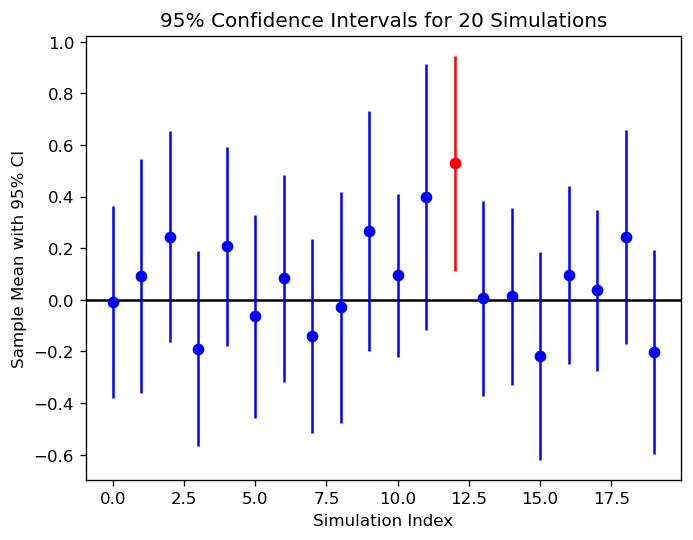

In [37]:
def ci_simulation():
    # Set the random seed to always get the same random numbers. 
    # This is for Reproducibility. 
    np.random.seed(4)
    
    # Create the figure.
    fig, ax = plt.subplots(dpi=120)

    # If the interval crosses this line, it should be blue, else red.
    ax.axhline(0, color='k')

    # Do the following 20 times
    for i in range(20):
        # Draw 25 observations from a standard normal
        data = np.random.normal(0, 1, 25)

        # Compute what we need for the CI, namely the mean and the bounds
        mu, bounds = confidence_interval(data)
        
        # Color should be blue if it crosses the black line
        color = 'blue'
        if (bounds[0] > 0) or (bounds[1] < 0):
            # But in the case it does not, turn it red
            color = 'red'

        # Need to get the length of the interval from bounds
        interval_len = (bounds[1] - bounds[0]) / 2.0
        ax.errorbar(i, mu, yerr=interval_len, color=color, fmt='o')

    # This function does not have to return anything
    plt.xlabel('Simulation Index')
    plt.ylabel('Sample Mean with 95% CI')
    plt.title('95% Confidence Intervals for 20 Simulations')
    plt.show()
    return None

ci_simulation()

### Question 3: /8pts

If you haven't changed the random seed from 4 and if you implemented the solution correctly, you should see one red interval.

Answer the following below in no more than 3 sentences:

a) How many red intervals did we expect to see?  What is your justifiation for this?

Changing the random seed might affect how many red intervals you see.  Try changing the  random seed in your function to 3.  This will yield two red intervals (which is different than what you should expect to see). 

b) Why does the simulation sometimes deviate from the predicted results?

a **Answer**) We expected to see one red interval out of the 20 intervals because the confidence level is set to 95%. This means that, on average, 5% of the intervals (i.e., 1 out of 20) will not capture the true mean, resulting in a red interval.

b **Answer**) The simulation sometimes deviates from the predicted results due to the random variability inherent in sampling. Since each sample is randomly drawn, it's possible for the confidence intervals to behave differently each time, especially with a small number of samples, leading to more or fewer red intervals than the theoretical expectation.

### Question 4: /10pts

Load in the `hockey_draftees_2005.csv` data into pandas. It contains data from hockey players drafted in 2005, including their rank, weight (wt - in pounds) and height (ht - in inches). 

Fit a linear model of weight (`wt`) explained by height (`ht`) using a linear regression model from sklearn, as done in the lab (but with linear fit instead of cubic.)  Call your fitted model `model`.  
Make a scatter plot of the height (x-axis) against weight (y-axis). 
Add the predicted values for 66-80 inches. 

Calculate the residuals from the fit, and report the r-squared for this model.

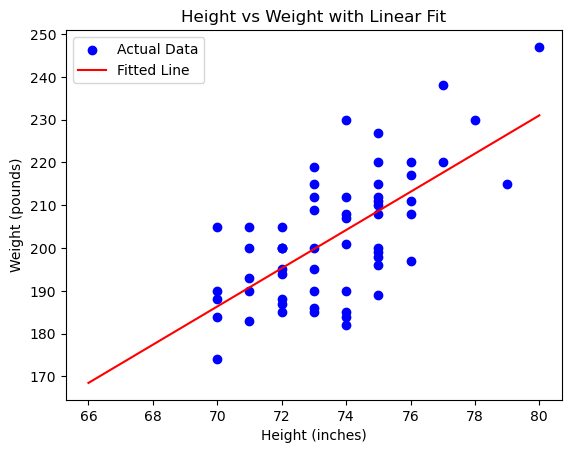

Training R-squared is: 0.43807746842392203


In [38]:
df=pd.read_csv('hockey_draftees_2005.csv')

# Create the linear regression object and fit the model
X = df[['ht']].values  # Predictor variable: height
y = df['wt'].values    # Response variable: weight

model = LinearRegression()
model.fit(X, y)

# Make the scatter plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

# Generate and plot the predicted values for 66-80 inches
x_pred = np.arange(66, 81).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, color='red', label='Fitted Line')
plt.legend()
plt.title('Height vs Weight with Linear Fit')
plt.show()

# Calculate residuals and R-squared
y_fitted = model.predict(X)
residuals = y - y_fitted
r_squared = r2_score(y, y_fitted)

# Print the R-squared value
print('Training R-squared is:', r_squared)


### Question 5:  /15pts
### Bootstrap confidence intervals on parameters

How confident can we be about the relation between height and weight? 
To judge this we need confidence intervals. Let's use the bootstrap.

Modify the function `BootstrapCoef` from lab 04 - part 2 to conduct a boostrap analysis for this regression mode; 

* `data`, which is a dataframe having columns 'weight' and 'height'
* `numboot` which is an integer denoting how many bootstrap replications to perform.

Write `bootstrap` to perform bootstrap resampling. You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.  `bootstrap` should return:
params: a numpy array of size [numboot,numParams] of bootstraped parameter values. The parameters are the intercept value and the slope from the linear regression. 
Tip: Note that the intercept can be retrieved from model.intercept_, whereas all the other regression coefficients are stored in model.coef_. 

Here is the documentation for `pd.DataFrame.sample`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

Then call the function to get 100 bootstrap samples for your linear regression model of wt explained by height. 
Make a joint scatter plot of the parameter value for the intercept and for the slope. 

In [39]:
# Write a Bootstrap function that records the fitted models
def BootstrapCoef(data, numboot=1000):
    params = np.zeros((numboot, 2))  # Store intercept and slope for each bootstrap sample
    
    for i in range(numboot):
        # Resample with replacement
        bootstrap_sample = data.sample(n=len(data), replace=True)
        
        # Fit linear regression model to the bootstrap sample
        X_boot = bootstrap_sample[['ht']].values
        y_boot = bootstrap_sample['wt'].values
        
        model = LinearRegression()
        model.fit(X_boot, y_boot)
        
        # Store the intercept and slope
        params[i, 0] = model.intercept_
        params[i, 1] = model.coef_[0]
    
    return params

# Load the dataset
df = pd.read_csv('hockey_draftees_2005.csv')

# Perform bootstrap with 100 replications
num_bootstrap = 100
params = BootstrapCoef(df, numboot=num_bootstrap)


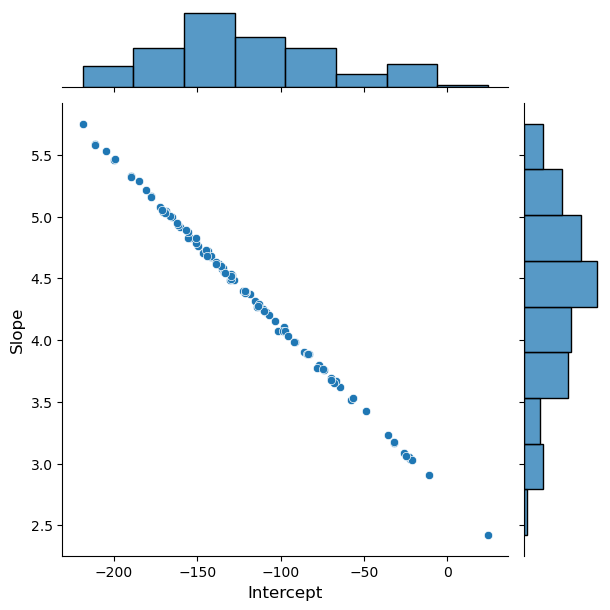

In [40]:
# Make scatter plot

# Make scatter plot
thetaBS = BootstrapCoef(df,100)
g = sns.jointplot(x=thetaBS[:,0],y=thetaBS[:,1])
g.set_axis_labels("Intercept", "Slope", fontsize=12)
plt.show()

### Question 6: /12pts

Plot the bootstrap estimates for the slope as a histogram.  Use your samples to compute a 95% confidence interval. Note that the CI should be constructed around the sample estimate of the slope. How can you interpret this confindence interval?  

My confidence interval is between 3.034717541310492  and  5.559110852360089


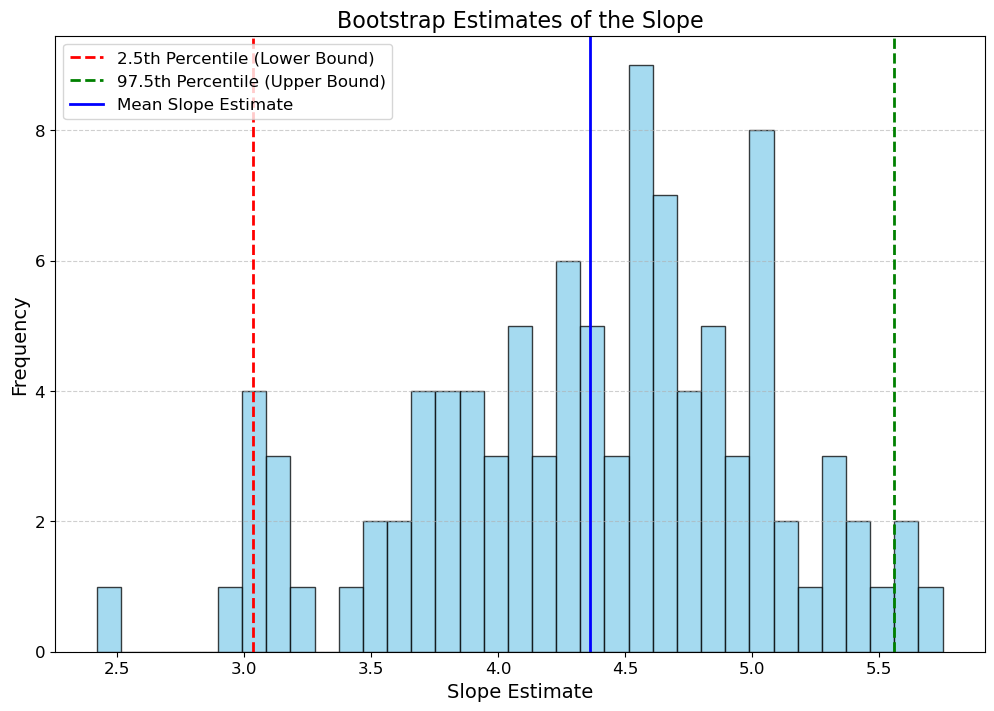

In [41]:
# Calculate bootstrap interval
slope_estimates = thetaBS[:, 1]
boot_ci = [np.quantile(slope_estimates, 0.025),
           np.quantile(slope_estimates, 0.975)]


print('My confidence interval is between', boot_ci[0], ' and ', boot_ci[1])

plt.figure(figsize=(12, 8))
plt.hist(slope_estimates, bins=35, edgecolor='black', alpha=0.75, color='skyblue')
plt.axvline(boot_ci[0], color='red', linestyle='--', linewidth=2, label='2.5th Percentile (Lower Bound)')
plt.axvline(boot_ci[1], color='green', linestyle='--', linewidth=2, label='97.5th Percentile (Upper Bound)')
plt.axvline(np.mean(slope_estimates), color='blue', linestyle='-', linewidth=2, label='Mean Slope Estimate')
plt.title('Bootstrap Estimates of the Slope', fontsize=16)
plt.xlabel('Slope Estimate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Written answer: The interval contains the true slope parameter with a probability of 95%. 

### Question 7: /15pts
Modify the function `BootstrapPred` from lab04 to bootstrap your fit and generate a predict from each of these bootstrapped models.  

Draw again a scatter plot of ht against weight. and plot the predictions from the 20 fitted bootstrap models to derive predictions for the height ranging from 66 to 80. Draw all these lines onto your scatter plot. 

Written question: Where are we most uncertain in our prediction about the weight of a player? How does the negative correlation between slope and intercept play a role here?  Why is the spread of the prediction in the mean weight so much lower than the variability of our intercept parameter? 

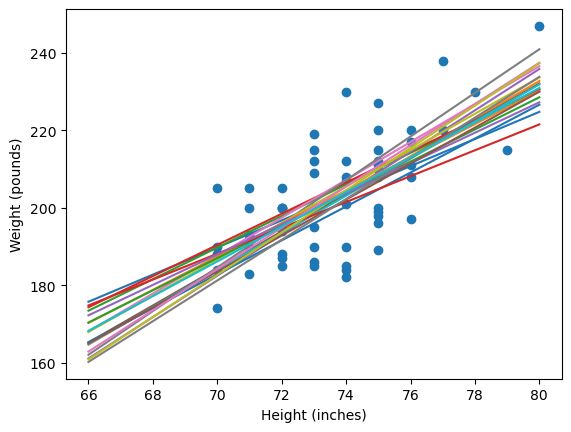

In [42]:
# Write a Bootstrap function that records the fitted models 

def BootstrapPred(data,xp):
    numboot = 1000
    n = len(data)
    X_pred = xp
    y_pred = np.zeros((numboot,X_pred.shape[0]))    

    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.ht]
        regr = LinearRegression().fit(X_fit,d.wt)
        y_pred[i,:]=regr.predict(X_pred)
    return y_pred
    
# Get predictions from 20 bootstrapped models
p_height = np.arange(66,81).reshape(-1,1)
y_pred = BootstrapPred(df,p_height)

# Make a scatterplot and draw the 20 lines  
plt.scatter(X,y)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

for i in range(20):
    plt.plot(p_height,y_pred[i,:])



Where are we most uncertain in our prediction about the weight of a player? 
* We are most uncertain at the extremes of the height range (i.e., very short or very tall players). This is because we have fewer data points at the boundaries, leading to greater variability in model predictions.

How does the negative correlation between slope and intercept play a role here? 
* The negative correlation between the slope and intercept results in a compensating effect; when one parameter increases, the other decreases. This leads to different fitted lines intersecting around the center of the height range, reducing uncertainty in that region.

Why is the spread of the prediction in the mean weight so much lower than the variability of our intercept parameter?
* The spread of predictions in the mean weight is lower because the variability of the intercept is partially offset by the slope. Changes in intercept are balanced by changes in the slope, resulting in a more consistent prediction for mean weight, especially in the middle of the data range.

### Question 8:  /15pts

Now, let's see how well our model performs out of sample.  Load in the `hockey_draftees_test.csv` file into a dataframe.  
Use your fitted `model` to make predictions. 

Make a scatter plot of the test data and superimpose the prediction of the model. 
To evaluate this prediction, calculate the r-squared value for the out of sample (oos) data.  Statsmodels doesn't provide a function to compute r-squared on new data.  You will have to write one yourself or find one that performs the computation for you.

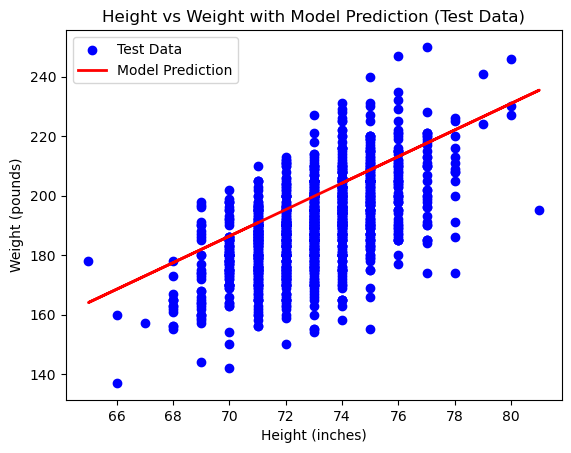

Out of sample R-squared is: -0.015001136144209504


In [43]:
# Load the dataset and fit the linear regression model
df = pd.read_csv('hockey_draftees_2005.csv')
X_train = df[['ht']].values
y_train = df['wt'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Load the test dataset
df_test = pd.read_csv('hockey_draftees_test.csv')
X_test = df_test[['ht']].values
y_test = df_test['wt'].values

# Make the scatter plot of the test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

# Generate and plot the predicted values for the test data
y_pred_test = model.predict(X_test)
plt.plot(X_test, y_pred_test, color='red', label='Model Prediction', linewidth=2)
plt.title('Height vs Weight with Model Prediction (Test Data)')
plt.legend()
plt.show()

# Calculate R-squared for the out of sample data
rsquared_oos = r2_score(y_test, y_pred_test)

# Print the R-squared value
print('Out of sample R-squared is:', rsquared_oos)